In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import gzip
import seaborn as sns
sns.set()

In [3]:
def parse(path): 
    g = gzip.open(path, 'rb') 
    for l in g: 
        yield eval(l) 
            
def getDF(path): 
    i = 0 
    df = {} 
    for d in parse(path): 
        df[i] = d 
        i += 1 
        
    return pd.DataFrame.from_dict(df, orient='index') 

In [4]:
df = getDF('data/reviews_Musical_Instruments_5.json.gz')

In [5]:
df.head()

,summary,reviewerName,reviewTime,overall,asin,helpful,unixReviewTime,reviewerID,reviewText
0,good,"cassandra tu ""Yeah, well, that's just like, u...","02 28, 2014",5.0,1384719342,"[0, 0]",1393545600,A2IBPI20UZIR0U,"Not much to write about here, but it does exac..."
1,Jake,Jake,"03 16, 2013",5.0,1384719342,"[13, 14]",1363392000,A14VAT5EAX3D9S,The product does exactly as it should and is q...
2,It Does The Job Well,"Rick Bennette ""Rick Bennette""","08 28, 2013",5.0,1384719342,"[1, 1]",1377648000,A195EZSQDW3E21,The primary job of this device is to block the...
3,GOOD WINDSCREEN FOR THE MONEY,"RustyBill ""Sunday Rocker""","02 14, 2014",5.0,1384719342,"[0, 0]",1392336000,A2C00NNG1ZQQG2,Nice windscreen protects my MXL mic and preven...
4,No more pops when I record my vocals.,SEAN MASLANKA,"02 21, 2014",5.0,1384719342,"[0, 0]",1392940800,A94QU4C90B1AX,This pop filter is great. It looks and perform...


## Group by product

In [6]:
most_reviewed_id = df.asin.value_counts().index[0]

sample = df[df.asin == most_reviewed_id]
sample

,summary,reviewerName,reviewTime,overall,asin,helpful,unixReviewTime,reviewerID,reviewText
8107,Eats batteries.,3rdtimer,"01 18, 2014",3.0,B003VWJ2K8,"[0, 0]",1390003200,A3MONHA5DCPPLZ,It works but shut it down as soon as you are f...
8108,awesome item,aashish,"01 12, 2013",5.0,B003VWJ2K8,"[0, 0]",1357948800,ASYHYW0USZVN6,very awesome item. really useful for tuning. h...
8109,nice tuner for the $,A F&amp;T,"11 28, 2011",5.0,B003VWJ2K8,"[1, 1]",1322438400,A1RSRUQVKB5EBO,My friend has commented on its bright color - ...
8110,Wow! Great tuner!,"AF ""Whigs""","03 4, 2011",5.0,B003VWJ2K8,"[0, 0]",1299196800,A22Z554ZQ8NFPC,I have another cheap clip on tuner from guitar...
8111,excellent tuner,A. Mayse,"12 18, 2011",5.0,B003VWJ2K8,"[0, 0]",1324166400,A2SBZZ1HSR7WSP,the snark series of tuners are the best small ...
8112,Very nice.,"Amazon Customer ""Description: Indescribable""","03 31, 2014",5.0,B003VWJ2K8,"[0, 0]",1396224000,A13TQHVN7WBUPD,"Very very useful. Like seriously, unless you ..."
8113,I love it!,"Amazon Customer ""j allen""","01 17, 2011",5.0,B003VWJ2K8,"[0, 0]",1295222400,A1H55L0BLPCWYF,I bought this just to see what everyone was ra...
8114,GET A SNARK.... Tuner!,"Amazon Customer ""Lauli""","11 17, 2013",5.0,B003VWJ2K8,"[0, 0]",1384646400,A2VDGYUTGIOL86,One of the best tuner's out there!! It was sh...
8115,Great Tunner,Amber,"12 13, 2012",5.0,B003VWJ2K8,"[0, 0]",1355356800,A3322FTE1MQQGM,I bought it for my violin I was a bit reluctan...
8116,Good tuner. Easy to read and use,Andy Clark,"11 18, 2012",5.0,B003VWJ2K8,"[0, 0]",1353196800,A3CUQ8L2S9ZW0H,Has worked very well so far. Need to make sur...


count    10254.000000
mean       486.260776
std        613.514024
min          9.000000
25%        163.000000
50%        285.000000
75%        552.000000
max      11310.000000
Name: reviewText, dtype: float64


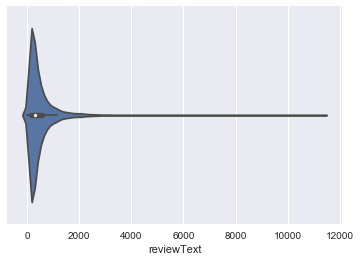

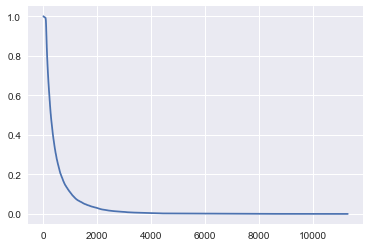

In [7]:
lengths = df['reviewText'].str.len()
lengths = lengths[(lengths > 0)]
print(lengths.describe())
sns.violinplot(lengths)
plt.show()

lengths_sorted = lengths.sort_values()
y = np.array(list(range(len(lengths_sorted))))
y = y / len(lengths_sorted)
y = y[::-1]
lengths_sorted.head()
plt.plot(lengths_sorted, y)
plt.show()

# Natural language processing

In [8]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [10]:
reviewText = sample.reviewText.copy()
reviewText = reviewText.str.split()
raw = [element for list_ in reviewText for element in list_]

In [11]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(raw)
finder.apply_freq_filter(7)
finder.nbest(trigram_measures.pmi, 10)

[('easy', 'to', 'read'),
 ('easy', 'to', 'use.'),
 ('The', 'display', 'is'),
 ('easy', 'to', 'use'),
 ('very', 'easy', 'to'),
 ('is', 'the', 'best'),
 ('is', 'a', 'great'),
 ('is', 'easy', 'to'),
 ('to', 'use.', 'I'),
 ('to', 'use', 'and')]

## Tagging words

In [12]:
from nltk import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [13]:
nltk.help.upenn_tagset('JJS')

JJS: adjective, superlative
    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...


## Sentiment analysis

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

In [19]:
class SentimentAnalyser:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        
    def _penn_to_wn(self, tag):
        """
        Convert between the PennTreebank tags to simple Wordnet tags
        """
        if tag.startswith('J'):
            return wn.ADJ
        elif tag.startswith('N'):
            return wn.NOUN
        elif tag.startswith('R'):
            return wn.ADV
        elif tag.startswith('V'):
            return wn.VERB
        return None

    def sentiment_for_tagged_word(self, tagged_word):
        """
        Compute the score for a given tagged word.
        The word is assumed to be tagged using the Penn Treebank Project's tags
        Return None for irrelevant words, a tuple (positive score, negative score) otherwise
        """
        word, tag = tagged_word
        
        wn_tag = self._penn_to_wn(tag)
        
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            return None
        
        lemma = self.lemmatizer.lemmatize(word, pos=wn_tag)
        
        if not lemma:
            return None
        
        synsets = wn.synsets(lemma, pos=wn_tag)
        
        if not synsets:
            return None
        
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        return swn_synset.pos_score(), swn_synset.neg_score()
    
    def sentiment_score_for_raw_sentence(self, raw_sentence):
        """
        Compute the sum of the differences in sentiment score for each word in the sentence
        """
        tagged_sentence = nltk.pos_tag(word_tokenize(raw_sentence))
        sum_deltas = 0

        for tagged_word in tagged_sentence:
            scores = self.sentiment_for_tagged_word(tagged_word)

            if scores is None:
                continue
                
            pos_score, neg_score = scores
            sum_deltas += (pos_score - neg_score)
        
        return sum_deltas
        


In [20]:
s = SentimentAnalyser()
a = s.sentiment_score_for_raw_sentence("Certainly the best book I have ever read")
a

1.0

In [172]:
raw_sentence = "Dankest object in the whole fucking world"
tagged_sentence = nltk.pos_tag(word_tokenize(raw_sentence))

for word, tag in tagged_sentence:
    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        continue

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        continue

    synsets = wn.synsets(lemma, pos=wn_tag)
    if not synsets:
        continue

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    print(swn_synset)
    print(swn_synset.pos_score())
    print(swn_synset.neg_score())


<clammy.s.01: PosScore=0.0 NegScore=0.25>
0.0
0.25
<object.n.01: PosScore=0.0 NegScore=0.0>
0.0
0.0
<whole.a.01: PosScore=0.125 NegScore=0.0>
0.125
0.0
<fuck.n.01: PosScore=0.0 NegScore=0.0>
0.0
0.0
<universe.n.01: PosScore=0.0 NegScore=0.0>
0.0
0.0
